# MNIST classifier from nnBuilder

This is a simple implementation of a MNIST classifier using the nnBuilder framework. The network is essentially identical to the one from the TensorFlow tutorial at https://www.tensorflow.org/tutorials/mnist/pros/.

In [1]:
import numpy as np
import tensorflow as tf
import sys, os, seaborn, time
import matplotlib.pyplot as plt
sys.path.append('../nnBuilder')
from nnLayer import *
from nnInput import *
from nnTrainer import *
from nnHandler import *

In [2]:
test_split_n=10 #Avoid OOM
data=Layer(type="MNIST",batch=128)
data_test=Layer(type="MNIST",test=True)
data_test=Layer(x=data_test,type="Batch_Slice",batch=10000//test_split_n)
layers=[]
layers.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=32,relu=True))
layers.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
layers.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=64,relu=True))
layers.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
layers.append(dict(type="Relu",size=64))
layers.append(dict(type="Linear",size=10,in_features=["Dropout"]))
network_def=dict(type="Network",layers=layers)
network=Layer(x=data,**network_def)
network_test=network.copy(x=data_test,share_vars=True,test=True)
trainer=ClassifierTrainer(network=network,optimizer="adam")
tester=ClassifierTrainer(network=network_test,test=True)
sess=SessManager(data,network,trainer,data_test,network_test,tester)

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz


Error rate (train): 0.943984
Error rate (test): 0.942


<IPython.core.display.Javascript object>


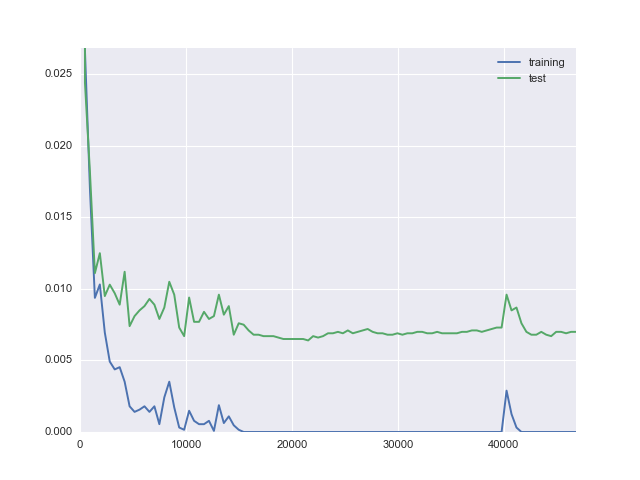

Error rate (train): 0.0266406
Error rate (test): 0.0244
Error rate (train): 0.0170313
Error rate (test): 0.0182
Error rate (train): 0.009375
Error rate (test): 0.0111
Error rate (train): 0.0103125
Error rate (test): 0.0125
Error rate (train): 0.00695312
Error rate (test): 0.0095
Error rate (train): 0.00492187
Error rate (test): 0.0103
Error rate (train): 0.004375
Error rate (test): 0.0097
Error rate (train): 0.00453125
Error rate (test): 0.0089
Error rate (train): 0.00351562
Error rate (test): 0.0112
Error rate (train): 0.00179688
Error rate (test): 0.0074
Error rate (train): 0.00140625
Error rate (test): 0.0081
Error rate (train): 0.0015625
Error rate (test): 0.0085
Error rate (train): 0.00179688
Error rate (test): 0.0088
Error rate (train): 0.00140625
Error rate (test): 0.0093
Error rate (train): 0.00179688
Error rate (test): 0.0089
Error rate (train): 0.000546875
Error rate (test): 0.0079
Error rate (train): 0.00242188
Error rate (test): 0.0087
Error rate (train): 0.00351562
Error r

In [3]:
batches_per_step=60000//128 #About 1 epoch
batches_per_eval=100
n_steps=100
def make_plt():
    %matplotlib notebook
    global fig,ax,train_plot,test_plot#,eval_plot
    fig,ax = plt.subplots(1,1)
    train_plot=ax.plot([],[], label="training")[0]
    #eval_plot=ax.plot([],[], label="eval")[0]
    test_plot=ax.plot([],[], label="test")[0]
    ax.set_ylim(0,1)
    plt.legend()
    fig.canvas.draw()
    time.sleep(.01)
def update_plt():
    x=[batches_per_step*i for i in range(len(trains))]
    train_plot.set_xdata(x)
    train_plot.set_ydata(trains)
    test_plot.set_xdata(x)
    test_plot.set_ydata(tests)
    #eval_plot.set_xdata(x)
    #eval_plot.set_ydata(evals)
    ax.set_xlim(0,x[-1])
    ax.set_ylim(0,tests[1]*1.1)
    fig.canvas.draw()
    #time.sleep(.01)
if "trains" not in globals():
    trains=[trainer.eval_error(n=batches_per_eval)[1]]
    #evals=[trainer_eval.eval_loss(n=batches_per_eval)]
    tests=[tester.eval_error()[1]]
make_plt()
for i in range(n_steps):
    trainer.train(batches_per_step,keep_rate=0.5,l2reg=1e-2)
    trains.append(trainer.eval_error(n=batches_per_eval)[1]) #Training error, reaches 0%
    #evals.append(trainer_eval.eval_loss(n=batches_per_eval)) 
    tests.append(tester.eval_error(n=test_split_n)[1])#Testing error, reaches 0.6-0.7%
    update_plt()

In [4]:
network.save() #The full network definition
save=network.save() #The full network definition
assert(Layer(x=data,**save).save()==save) #Consistency
print(save==network_def) #Saving adds stuff, should still be equivalent
save

True


{'layers': [{'pad': 'SAME',
   'relu': True,
   'size': 32,
   'stride': 1,
   'type': 'Convolution',
   'window': 5},
  {'pad': 'SAME',
   'pool_type': 'max',
   'stride': 2,
   'type': 'Pool',
   'window': 2},
  {'pad': 'SAME',
   'relu': True,
   'size': 64,
   'stride': 1,
   'type': 'Convolution',
   'window': 5},
  {'pad': 'SAME',
   'pool_type': 'max',
   'stride': 2,
   'type': 'Pool',
   'window': 2},
  {'size': 64, 'type': 'Relu'},
  {'in_features': ['Dropout'], 'size': 10, 'type': 'Linear'}],
 'type': 'Network'}

In [5]:
import sys, os, seaborn, time
t0=time.time()
trainer.train(600000//128,keep_rate=0.5)
time.time()-t0

36.377408504486084